In [1]:
from flask_app.db.data import DataReader
import pandas as pd
import sqlite3, os
import seaborn as sns
import pickle

In [14]:
con = sqlite3.connect("finance.db")

# 1. raw data

In [15]:
df = DataReader.execute_export_db("finance")
df.to_sql("finance", con)

5896

In [31]:
df["VIX"]

index
2004-01-01    18.219999
2004-01-02    18.219999
2004-01-03    17.854999
2004-01-05    17.490000
2004-01-06    16.730000
                ...    
2022-10-26    27.280001
2022-10-27    27.389999
2022-10-28    25.750000
2022-10-31    25.879999
2022-11-01    25.879999
Name: VIX, Length: 5896, dtype: float64

# 2. result data

In [22]:
y_result_norm = DataReader.execute_export_db("model_results")
y_result_norm.to_sql("y_normal", con, if_exists="replace")

234

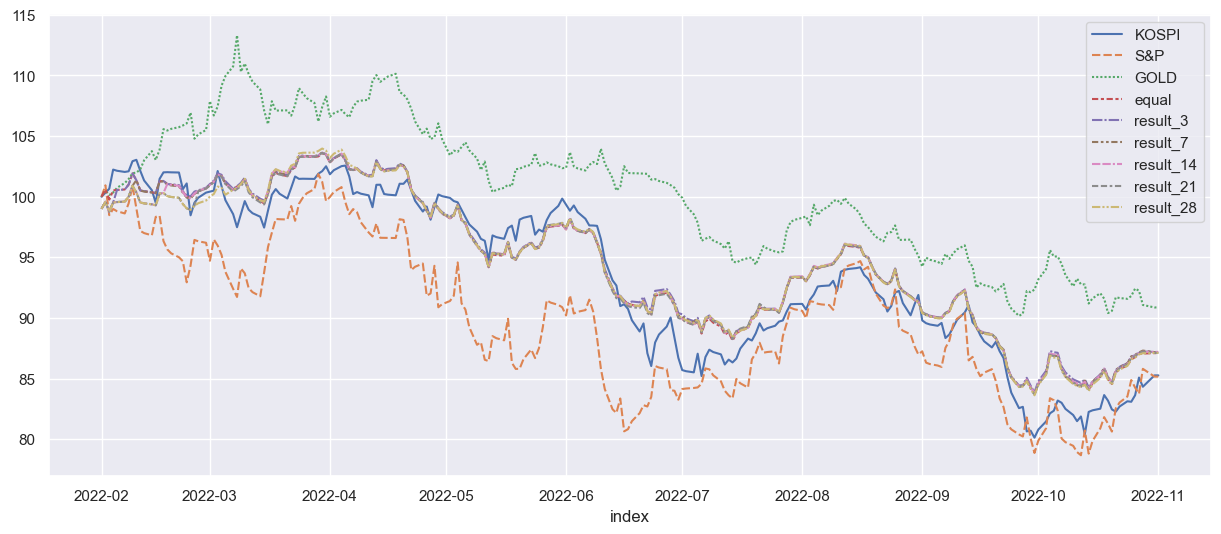

In [27]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(y_result_norm);

In [23]:
y_result_softmax = DataReader.execute_export_db("model_results_softmax")
y_result_softmax.to_sql("y_softmax.csv", con , if_exists="replace")

234

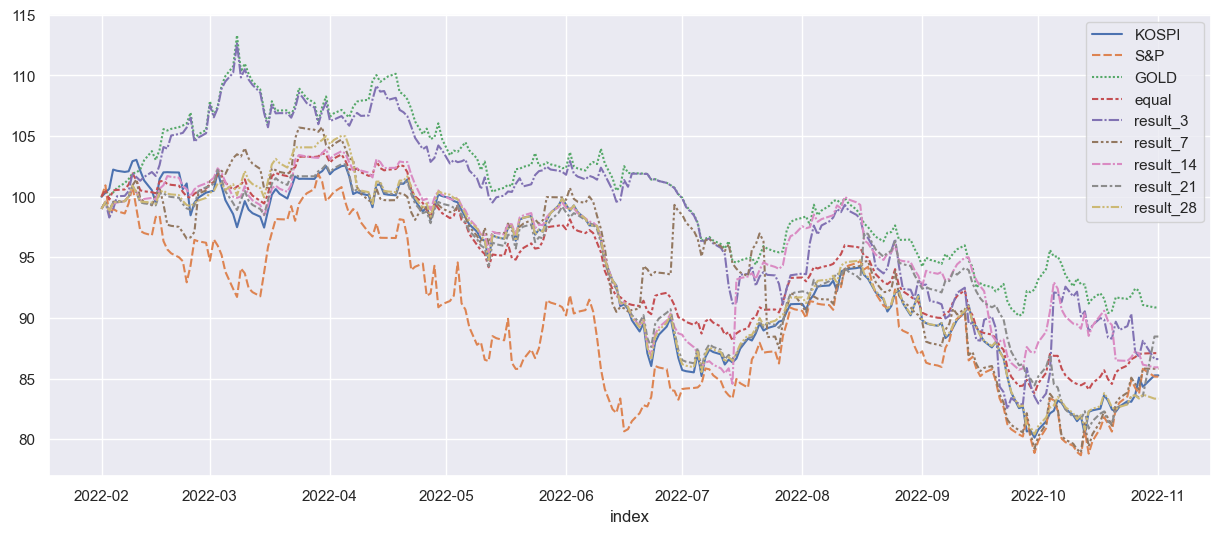

In [28]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(y_result_softmax);

In [24]:
y_total = DataReader.execute_export_db("model_results_total")
y_total.to_sql("y_total", con, if_exists="replace")

468

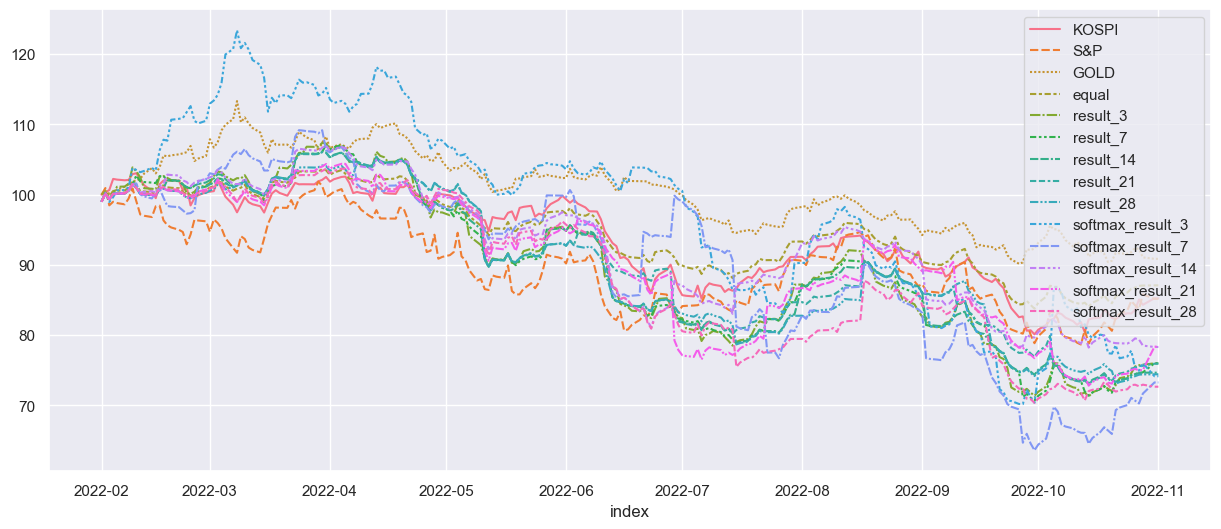

In [29]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.lineplot(y_total);

In [30]:
!docker cp finance.db metabase:/home/metabase

# 3. weights

In [3]:
FILE_PATH = f"{os.getcwd()}//flask_app//model//"
softmax_weights = []
for name in [3,7,14,21,28]:

    db_name = f"softmax_weights_{name}"
    weight = DataReader.execute_export_db(db_name)
    softmax_weights.append(weight)
    file_name = f"{FILE_PATH}{db_name}.pickle"
    with open(file_name, 'wb') as f:
        pickle.dump(weight, f)